In [94]:
library(readxl)
library(survival)
library(survminer)
library(KMsurv)
library(broom)
library(MASS)
library(dplyr)
library(ggplot2)
library(ggpubr)

Warning message:
"package 'MASS' was built under R version 4.2.3"

Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select




In [4]:
data <- read_excel('/Users/mraffyzeidan/Documents/Code/Modsur/Final Data.xlsx')

In [5]:
head(data)

age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,1,0,0,2,1,0,4,1
0,0,2,0,1,0,0,0,3,1,0,6,1
0,0,0,0,0,0,0,0,2,1,1,7,1
0,1,0,0,0,0,0,0,3,1,0,7,1
0,1,0,1,0,0,0,0,0,0,0,8,1
1,1,0,0,1,1,0,0,2,1,1,8,1


In [6]:
str(data)

tibble [299 x 13] (S3: tbl_df/tbl/data.frame)
 $ age                     : num [1:299] 1 0 0 0 0 1 1 0 0 1 ...
 $ anaemia                 : num [1:299] 0 0 0 1 1 1 1 1 0 1 ...
 $ creatinine_phosphokinase: num [1:299] 0 2 0 0 0 0 0 0 0 0 ...
 $ diabetes                : num [1:299] 0 0 0 0 1 0 0 1 0 0 ...
 $ ejection_fraction       : num [1:299] 0 1 0 0 0 1 0 2 2 0 ...
 $ high_blood_pressure     : num [1:299] 1 0 0 0 0 1 0 0 0 1 ...
 $ platelets               : num [1:299] 0 0 0 0 0 0 0 1 0 0 ...
 $ serum_creatinine        : num [1:299] 0 0 0 0 0 0 0 0 0 2 ...
 $ serum_sodium            : num [1:299] 2 3 2 3 0 2 3 2 3 2 ...
 $ sex                     : num [1:299] 1 1 1 1 0 1 1 1 0 1 ...
 $ smoking                 : num [1:299] 0 0 1 0 0 1 0 1 0 1 ...
 $ time                    : num [1:299] 4 6 7 7 8 8 10 10 10 10 ...
 $ DEATH_EVENT             : num [1:299] 1 1 1 1 1 1 1 1 1 1 ...


------------------------------------------------------------------------

## Load Dataset 

In [7]:
colnm = c(
    'age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction',
    'high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking'
    )

In [8]:
df = data

df[,colnm] = lapply(df[,colnm],factor)

In [9]:
str(df)

tibble [299 x 13] (S3: tbl_df/tbl/data.frame)
 $ age                     : Factor w/ 2 levels "0","1": 2 1 1 1 1 2 2 1 1 2 ...
 $ anaemia                 : Factor w/ 2 levels "0","1": 1 1 1 2 2 2 2 2 1 2 ...
 $ creatinine_phosphokinase: Factor w/ 3 levels "0","1","2": 1 3 1 1 1 1 1 1 1 1 ...
 $ diabetes                : Factor w/ 2 levels "0","1": 1 1 1 1 2 1 1 2 1 1 ...
 $ ejection_fraction       : Factor w/ 3 levels "0","1","2": 1 2 1 1 1 2 1 3 3 1 ...
 $ high_blood_pressure     : Factor w/ 2 levels "0","1": 2 1 1 1 1 2 1 1 1 2 ...
 $ platelets               : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 2 1 1 ...
 $ serum_creatinine        : Factor w/ 3 levels "0","1","2": 1 1 1 1 1 1 1 1 1 3 ...
 $ serum_sodium            : Factor w/ 5 levels "0","1","2","3",..: 3 4 3 4 1 3 4 3 4 3 ...
 $ sex                     : Factor w/ 2 levels "0","1": 2 2 2 2 1 2 2 2 1 2 ...
 $ smoking                 : Factor w/ 2 levels "0","1": 1 1 2 1 1 2 1 2 1 2 ...
 $ time                    : num [1:299]

------------------------------------------------------------------------

## Kaplan Meier dan Uji K Sampel

**A.) Age**

In [10]:
KM_Age = surv_fit(Surv(time ,DEATH_EVENT ) ~ age , data = df)

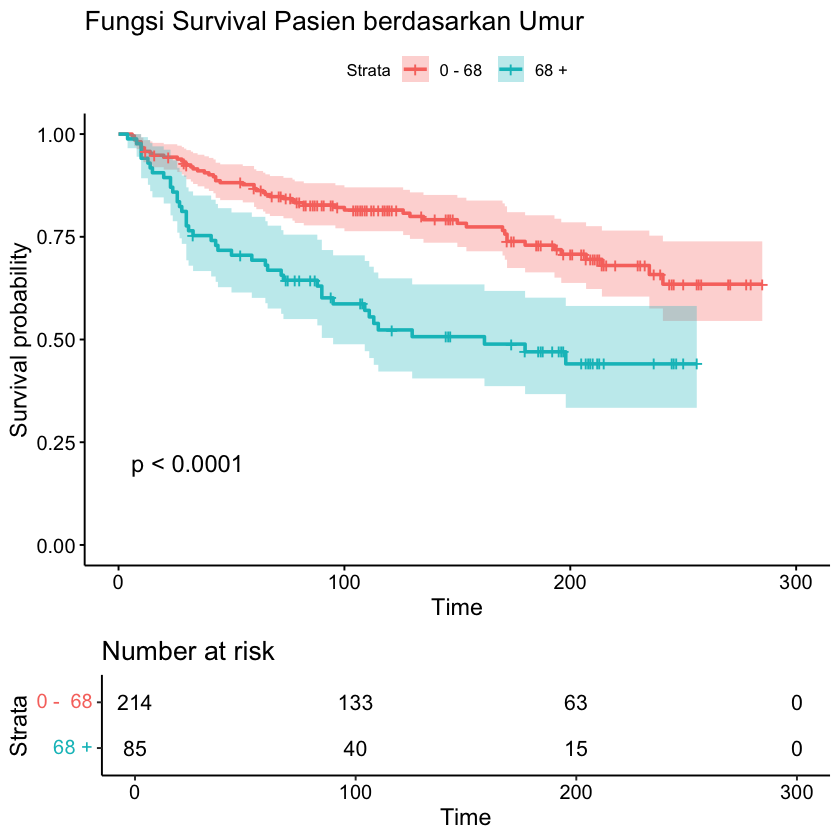

In [11]:
ggsurvplot(KM_Age, data = df, conf.int = TRUE, pval = TRUE, risk.table = TRUE,
           title = 'Fungsi Survival Pasien berdasarkan Umur' ,
           legend.labs = c('0 - 68', '68 +'))

In [12]:
survdiff(Surv(time, DEATH_EVENT)~ age, data = df)

Call:
survdiff(formula = Surv(time, DEATH_EVENT) ~ age, data = df)

        N Observed Expected (O-E)^2/E (O-E)^2/V
age=0 214       54     72.1      4.54      18.4
age=1  85       42     23.9     13.71      18.4

 Chisq= 18.4  on 1 degrees of freedom, p= 2e-05 

## Anaemia

In [13]:
KM_Anaemia = surv_fit(Surv(time ,DEATH_EVENT ) ~ anaemia, data = df)

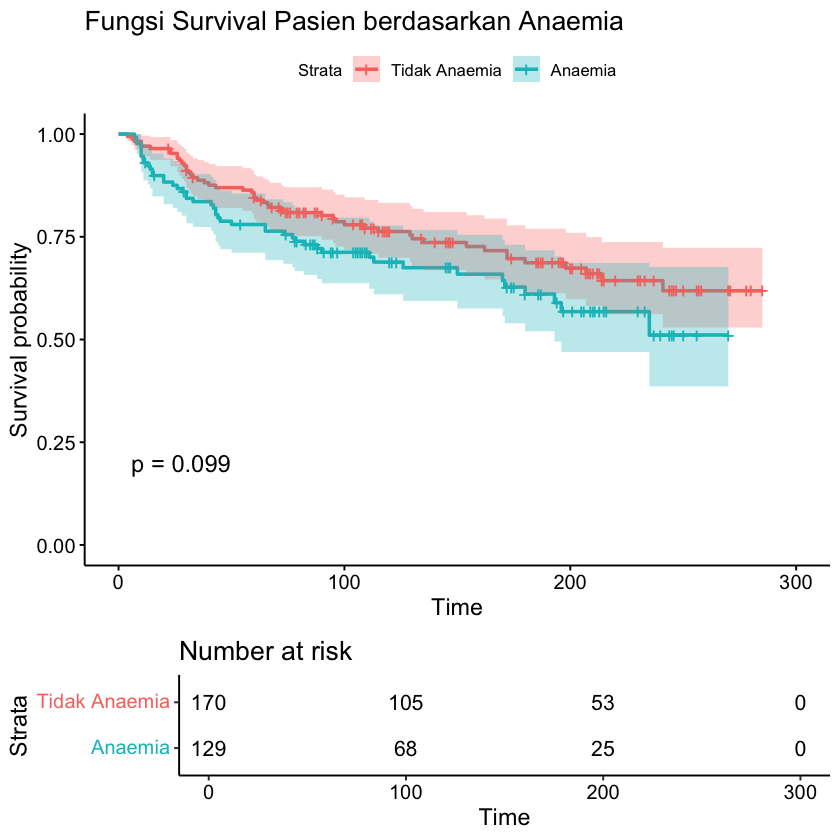

In [14]:
ggsurvplot(KM_Anaemia , data=df , conf.int=TRUE , pval=TRUE , risk.table=TRUE,
           title = 'Fungsi Survival Pasien berdasarkan Anaemia' ,
           legend.labs = c('Tidak Anaemia', 'Anaemia'))

In [15]:
survdiff(Surv(time, DEATH_EVENT)~ anaemia, data = df)

Call:
survdiff(formula = Surv(time, DEATH_EVENT) ~ anaemia, data = df)

            N Observed Expected (O-E)^2/E (O-E)^2/V
anaemia=0 170       50     57.9      1.07      2.73
anaemia=1 129       46     38.1      1.63      2.73

 Chisq= 2.7  on 1 degrees of freedom, p= 0.1 

## Creatiinine Phospokinase

In [16]:
KM_Creatine = surv_fit(Surv(time ,DEATH_EVENT ) ~ creatinine_phosphokinase, data = df)

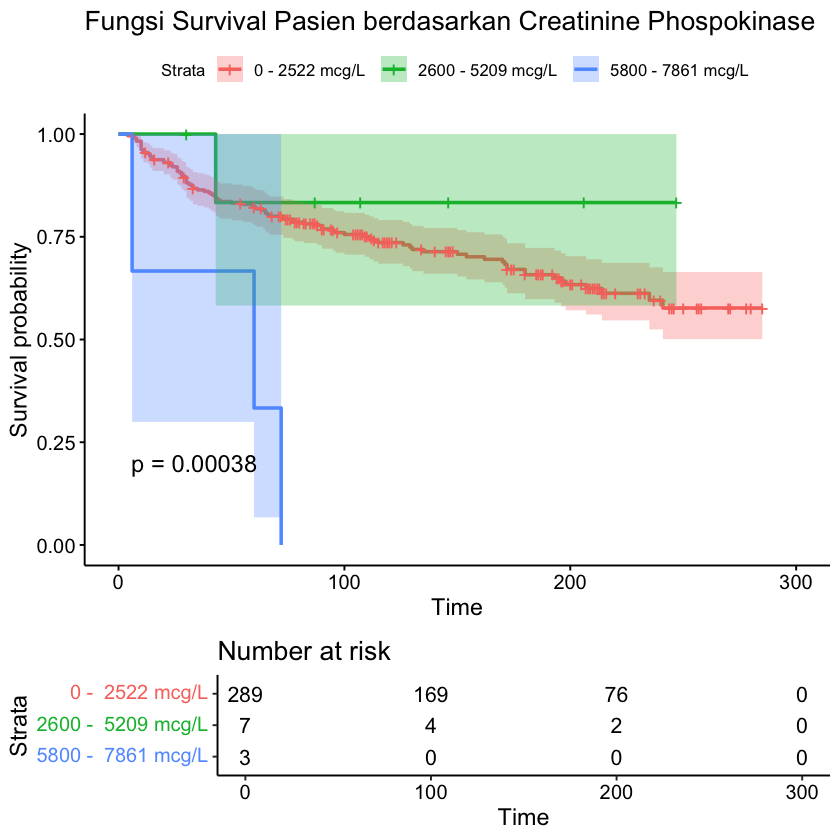

In [17]:
ggsurvplot(KM_Creatine , data=df , conf.int=TRUE , pval=TRUE , risk.table=TRUE,
            title = 'Fungsi Survival Pasien berdasarkan Creatinine Phospokinase' ,
           legend.labs = c('0 - 2522 mcg/L', '2600 - 5209 mcg/L' , '5800 - 7861 mcg/L'))

In [18]:
survdiff(Surv(time, DEATH_EVENT)~ creatinine_phosphokinase, data = df)

Call:
survdiff(formula = Surv(time, DEATH_EVENT) ~ creatinine_phosphokinase, 
    data = df)

                             N Observed Expected (O-E)^2/E (O-E)^2/V
creatinine_phosphokinase=0 289       92   93.373    0.0202     0.742
creatinine_phosphokinase=1   7        1    2.188    0.6450     0.663
creatinine_phosphokinase=2   3        3    0.439   14.9499    15.129

 Chisq= 15.7  on 2 degrees of freedom, p= 4e-04 

## Diabetes

In [19]:
KM_Diabet = surv_fit(Surv(time ,DEATH_EVENT ) ~ diabetes, data = df)

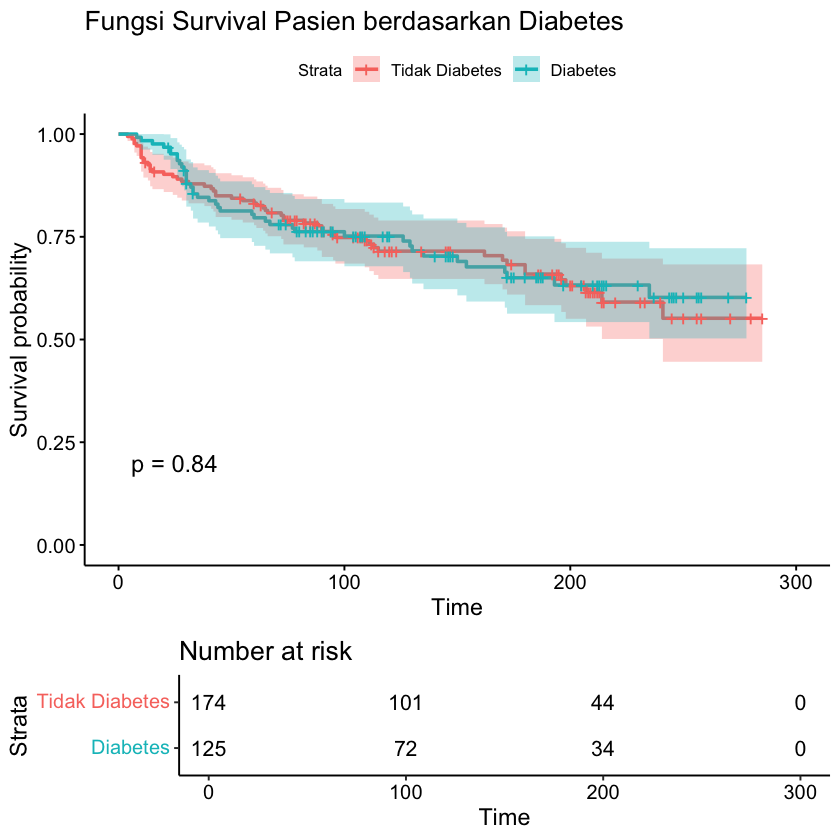

In [20]:
ggsurvplot(KM_Diabet , data=df , conf.int=TRUE , pval=TRUE , risk.table=TRUE,
         title = 'Fungsi Survival Pasien berdasarkan Diabetes' ,
           legend.labs = c('Tidak Diabetes','Diabetes'))

In [21]:
survdiff(Surv(time, DEATH_EVENT)~ diabetes, data = df)

Call:
survdiff(formula = Surv(time, DEATH_EVENT) ~ diabetes, data = df)

             N Observed Expected (O-E)^2/E (O-E)^2/V
diabetes=0 174       56       55    0.0172    0.0405
diabetes=1 125       40       41    0.0231    0.0405

 Chisq= 0  on 1 degrees of freedom, p= 0.8 

## Ejection Fraction

In [22]:
KM_EF = surv_fit(Surv(time ,DEATH_EVENT ) ~ ejection_fraction, data = df)

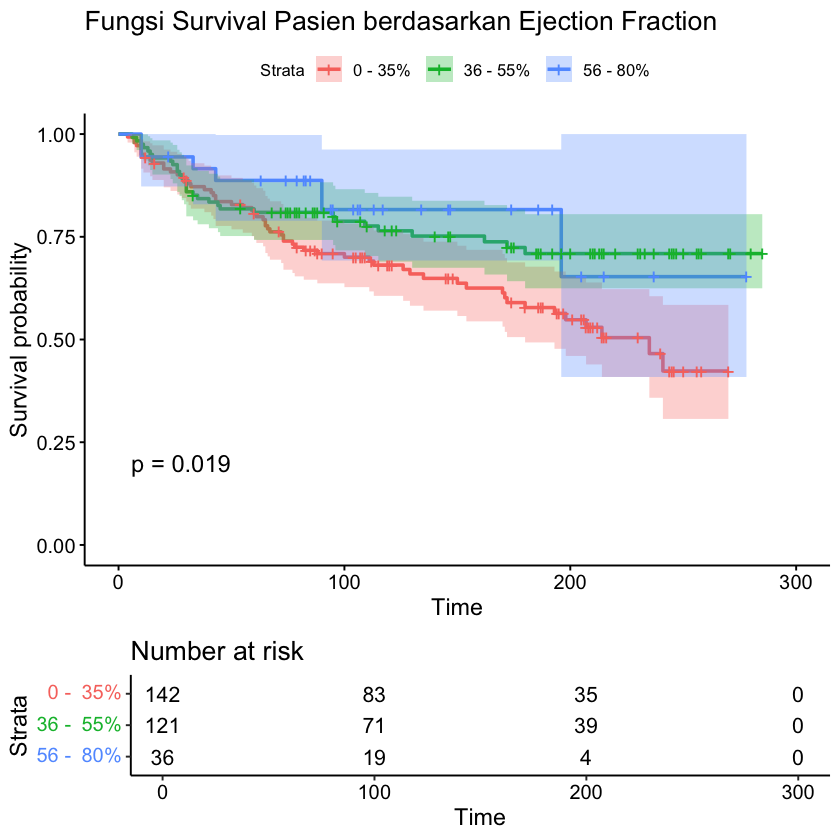

In [23]:
ggsurvplot(KM_EF , data=df , conf.int=TRUE , pval=TRUE , risk.table=TRUE,
         title = 'Fungsi Survival Pasien berdasarkan Ejection Fraction' ,
           legend.labs = c('0 - 35%','36 - 55%' , '56 - 80%'))

In [24]:
survdiff(Surv(time, DEATH_EVENT)~ ejection_fraction, data = df)

Call:
survdiff(formula = Surv(time, DEATH_EVENT) ~ ejection_fraction, 
    data = df)

                      N Observed Expected (O-E)^2/E (O-E)^2/V
ejection_fraction=0 142       58     44.4      4.19      7.83
ejection_fraction=1 121       31     40.8      2.36      4.15
ejection_fraction=2  36        7     10.8      1.34      1.53

 Chisq= 7.9  on 2 degrees of freedom, p= 0.02 

## Blood Pressure

In [25]:
KM_Blood = surv_fit(Surv(time ,DEATH_EVENT ) ~ high_blood_pressure, data = df)

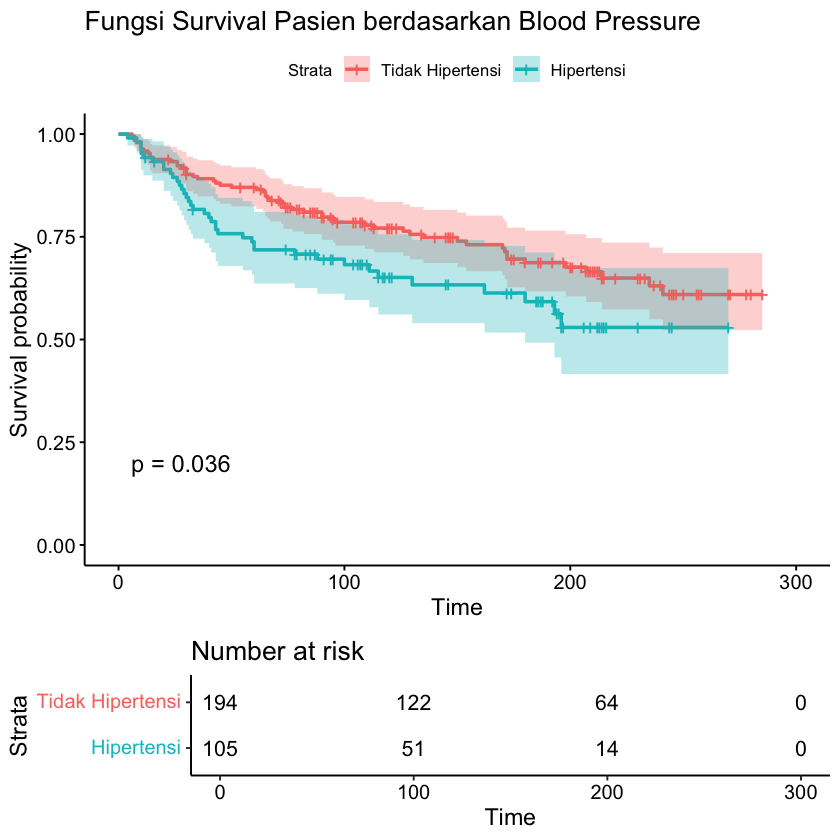

In [26]:
ggsurvplot(KM_Blood , data=df , conf.int=TRUE , pval=TRUE , risk.table=TRUE,
         title = 'Fungsi Survival Pasien berdasarkan Blood Pressure' ,
           legend.labs = c('Tidak Hipertensi','Hipertensi'))

In [27]:
survdiff(Surv(time, DEATH_EVENT)~ high_blood_pressure, data = df)

Call:
survdiff(formula = Surv(time, DEATH_EVENT) ~ high_blood_pressure, 
    data = df)

                        N Observed Expected (O-E)^2/E (O-E)^2/V
high_blood_pressure=0 194       57     66.4      1.34      4.41
high_blood_pressure=1 105       39     29.6      3.00      4.41

 Chisq= 4.4  on 1 degrees of freedom, p= 0.04 

## Platelets

In [28]:
KM_Plat = surv_fit(Surv(time ,DEATH_EVENT ) ~ platelets, data = df)

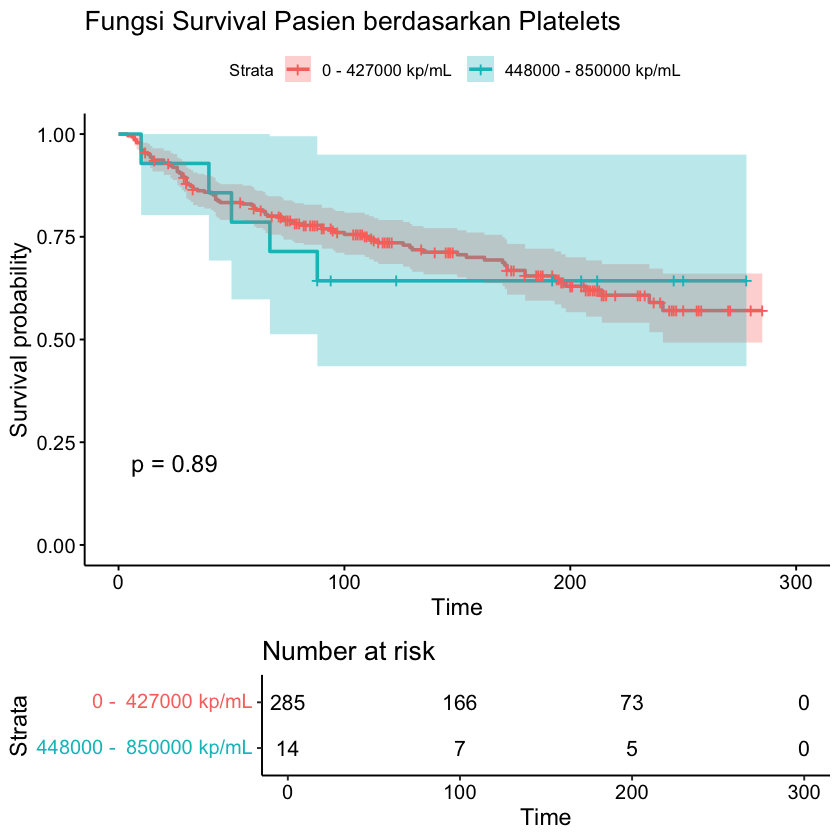

In [29]:
ggsurvplot(KM_Plat , data=df , conf.int=TRUE , pval=TRUE , risk.table=TRUE,
         title = 'Fungsi Survival Pasien berdasarkan Platelets' ,
           legend.labs = c('0 - 427000 kp/mL','448000 - 850000 kp/mL'))

In [30]:
survdiff(Surv(time, DEATH_EVENT)~ platelets, data = df)

Call:
survdiff(formula = Surv(time, DEATH_EVENT) ~ platelets, data = df)

              N Observed Expected (O-E)^2/E (O-E)^2/V
platelets=0 285       91    91.29   0.00095    0.0195
platelets=1  14        5     4.71   0.01843    0.0195

 Chisq= 0  on 1 degrees of freedom, p= 0.9 

## Serum Creatinine

In [31]:
KM_SC = surv_fit(Surv(time ,DEATH_EVENT ) ~ serum_creatinine, data = df)

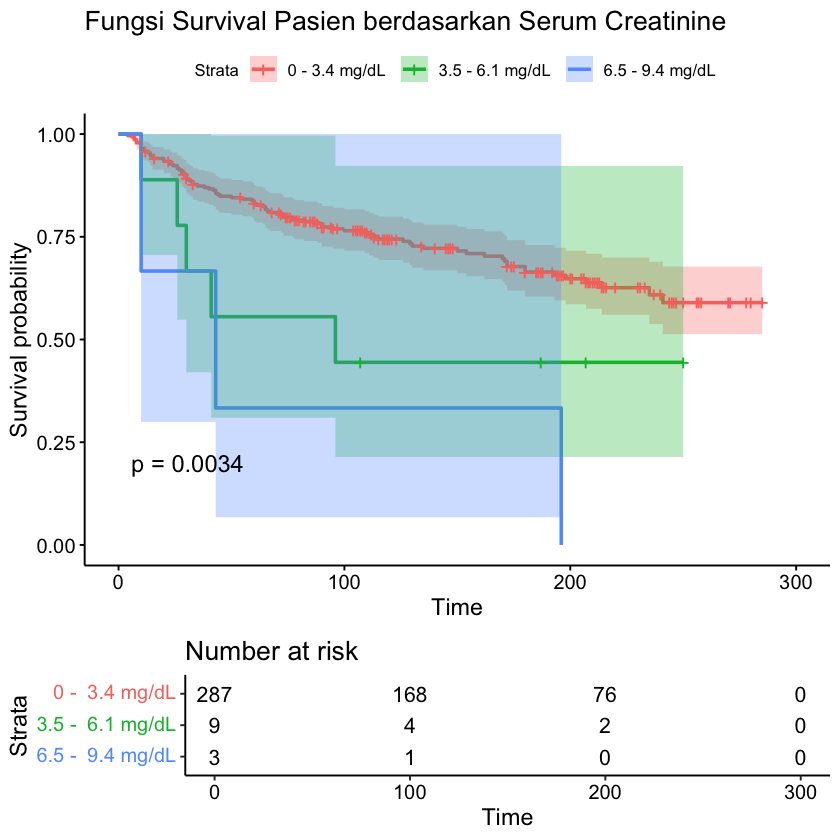

In [32]:
ggsurvplot(KM_SC , data=df , conf.int=TRUE , pval=TRUE , risk.table=TRUE,
         title = 'Fungsi Survival Pasien berdasarkan Serum Creatinine' ,
           legend.labs = c('0 - 3.4 mg/dL','3.5 - 6.1 mg/dL', '6.5 - 9.4 mg/dL'))

In [33]:
survdiff(Surv(time, DEATH_EVENT)~ serum_creatinine, data = df)

Call:
survdiff(formula = Surv(time, DEATH_EVENT) ~ serum_creatinine, 
    data = df)

                     N Observed Expected (O-E)^2/E (O-E)^2/V
serum_creatinine=0 287       88   92.913      0.26      8.12
serum_creatinine=1   9        5    2.428      2.73      2.81
serum_creatinine=2   3        3    0.659      8.32      8.42

 Chisq= 11.4  on 2 degrees of freedom, p= 0.003 

## Serum Sodium

In [34]:
KM_SS = surv_fit(Surv(time ,DEATH_EVENT ) ~ serum_sodium, data = df)

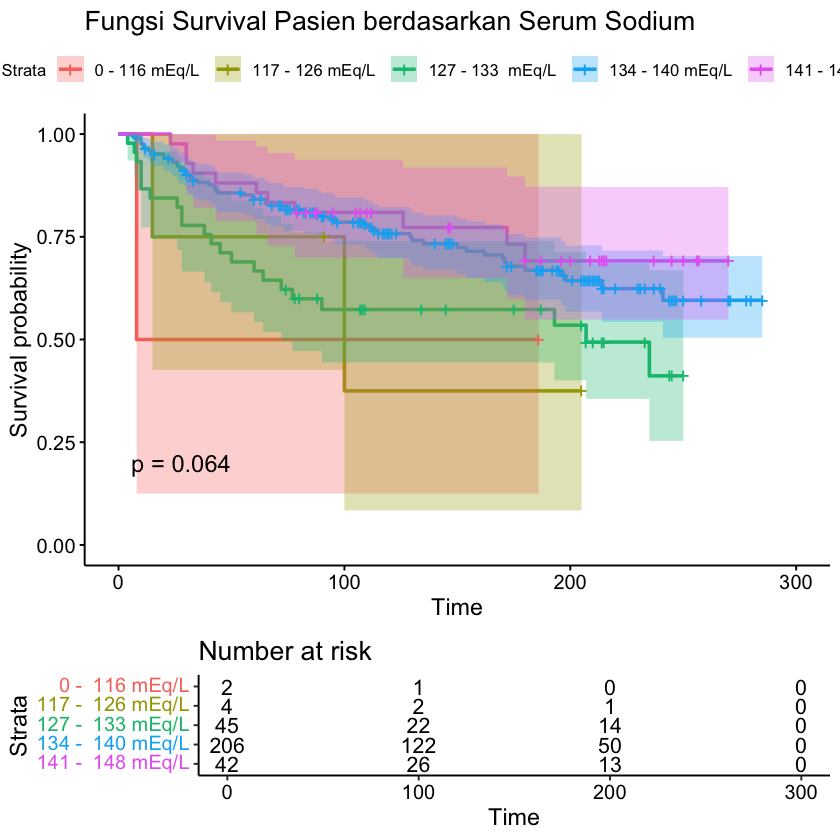

In [35]:
ggsurvplot(KM_SS , data=df , conf.int=TRUE , pval=TRUE , risk.table=TRUE,
         title = 'Fungsi Survival Pasien berdasarkan Serum Sodium' ,
           legend.labs = c('0 - 116 mEq/L','117 - 126 mEq/L', '127 - 133  mEq/L' ,
           '134 - 140 mEq/L' , '141 - 148 mEq/L'))

In [36]:
survdiff(Surv(time, DEATH_EVENT)~ serum_sodium, data = df)

Call:
survdiff(formula = Surv(time, DEATH_EVENT) ~ serum_sodium, data = df)

                 N Observed Expected (O-E)^2/E (O-E)^2/V
serum_sodium=0   2        1    0.443     0.702     0.708
serum_sodium=1   4        2    1.081     0.782     0.795
serum_sodium=2  45       22   13.257     5.766     6.723
serum_sodium=3 206       60   66.445     0.625     2.040
serum_sodium=4  42       11   14.775     0.964     1.144

 Chisq= 8.9  on 4 degrees of freedom, p= 0.06 

## Sex

In [37]:
KM_Sex = surv_fit(Surv(time ,DEATH_EVENT ) ~ sex, data = df)

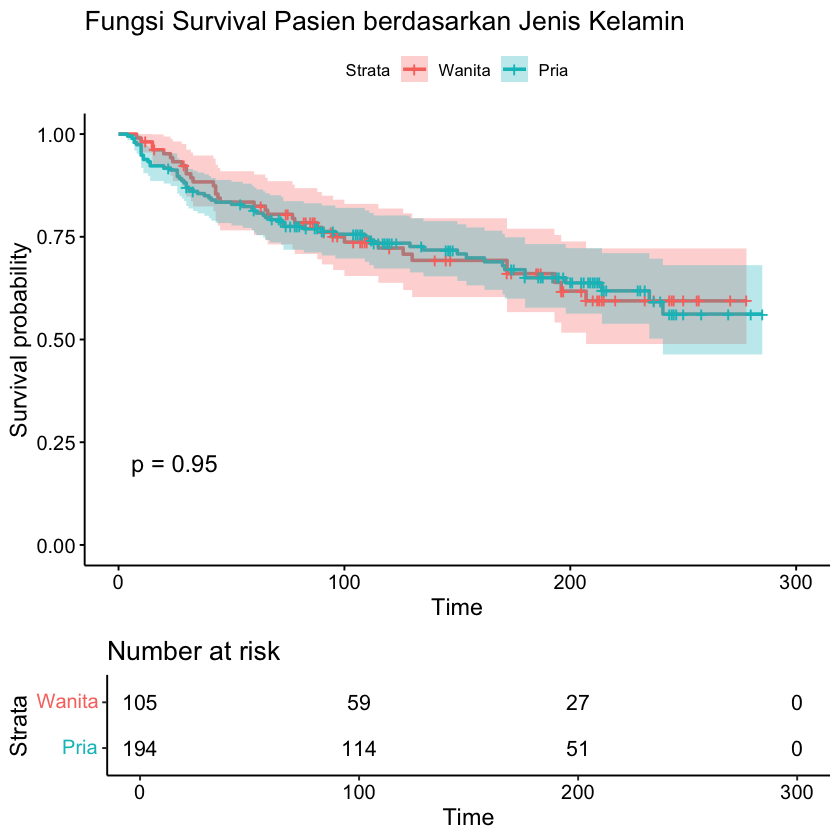

In [38]:
ggsurvplot(KM_Sex , data=df , conf.int=TRUE , pval=TRUE , risk.table=TRUE,
         title = 'Fungsi Survival Pasien berdasarkan Jenis Kelamin' ,
           legend.labs = c('Wanita','Pria'))

In [39]:
survdiff(Surv(time, DEATH_EVENT)~ sex, data = df)

Call:
survdiff(formula = Surv(time, DEATH_EVENT) ~ sex, data = df)

        N Observed Expected (O-E)^2/E (O-E)^2/V
sex=0 105       34     34.3   0.00254   0.00397
sex=1 194       62     61.7   0.00141   0.00397

 Chisq= 0  on 1 degrees of freedom, p= 0.9 

## Smoking

In [40]:
KM_Smoking = surv_fit(Surv(time ,DEATH_EVENT ) ~ smoking, data = df)

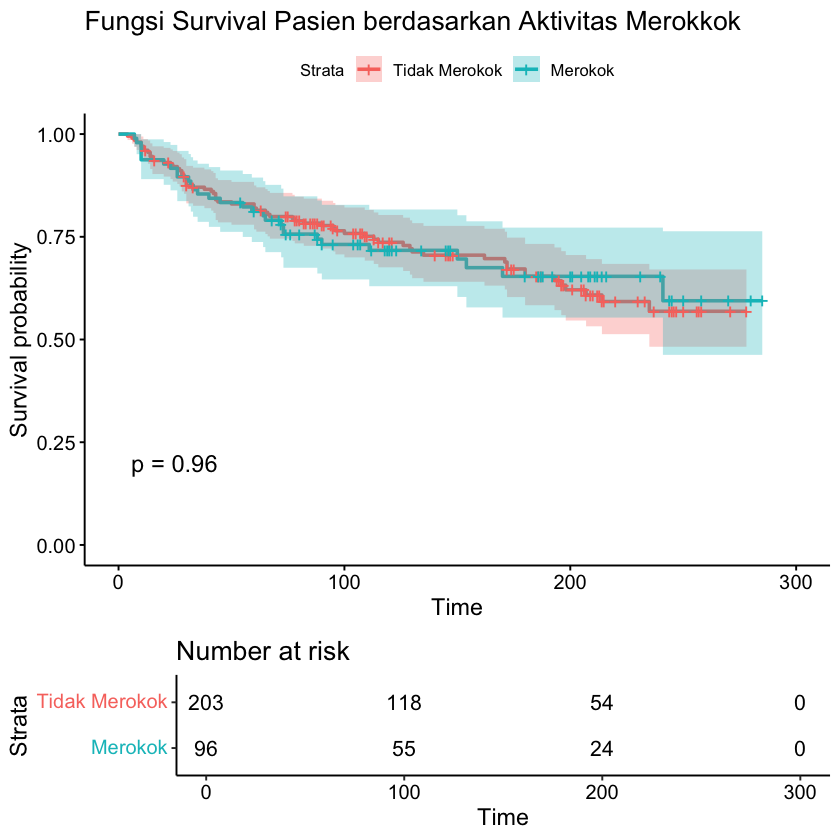

In [41]:
ggsurvplot(KM_Smoking , data=df , conf.int=TRUE , pval=TRUE , risk.table=TRUE,
         title = 'Fungsi Survival Pasien berdasarkan Aktivitas Merokkok' ,
           legend.labs = c('Tidak Merokok','Merokok'))

In [42]:
survdiff(Surv(time, DEATH_EVENT)~ smoking, data = df)

Call:
survdiff(formula = Surv(time, DEATH_EVENT) ~ smoking, data = df)

            N Observed Expected (O-E)^2/E (O-E)^2/V
smoking=0 203       66     65.8   0.00064   0.00204
smoking=1  96       30     30.2   0.00139   0.00204

 Chisq= 0  on 1 degrees of freedom, p= 1 

---------------------------------------------

## Pemodelan Cox PH

**1. Cox PH Assumption**

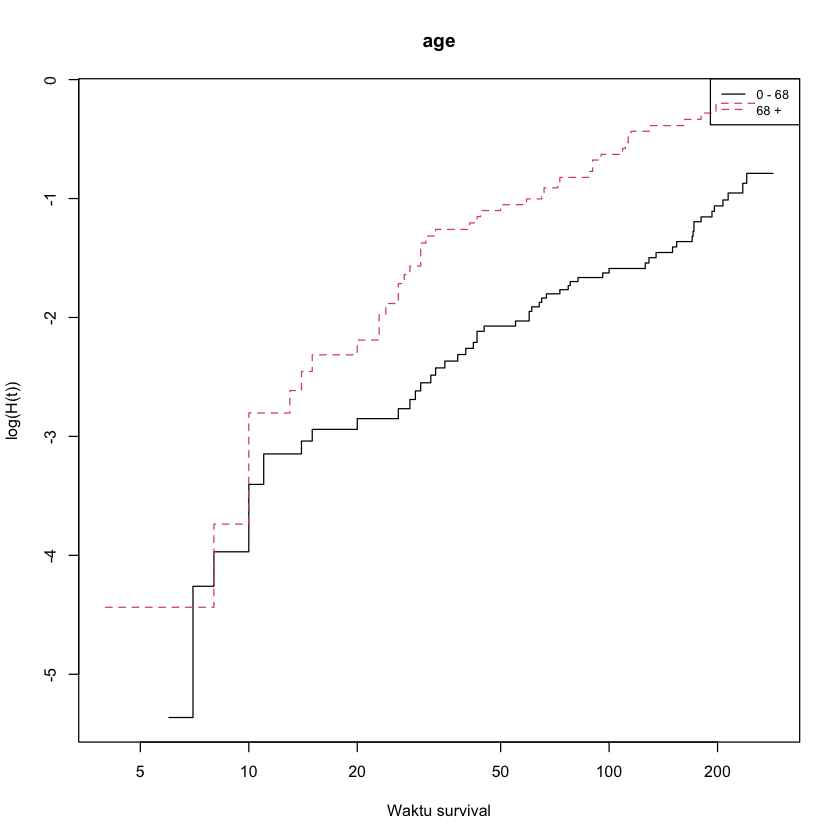

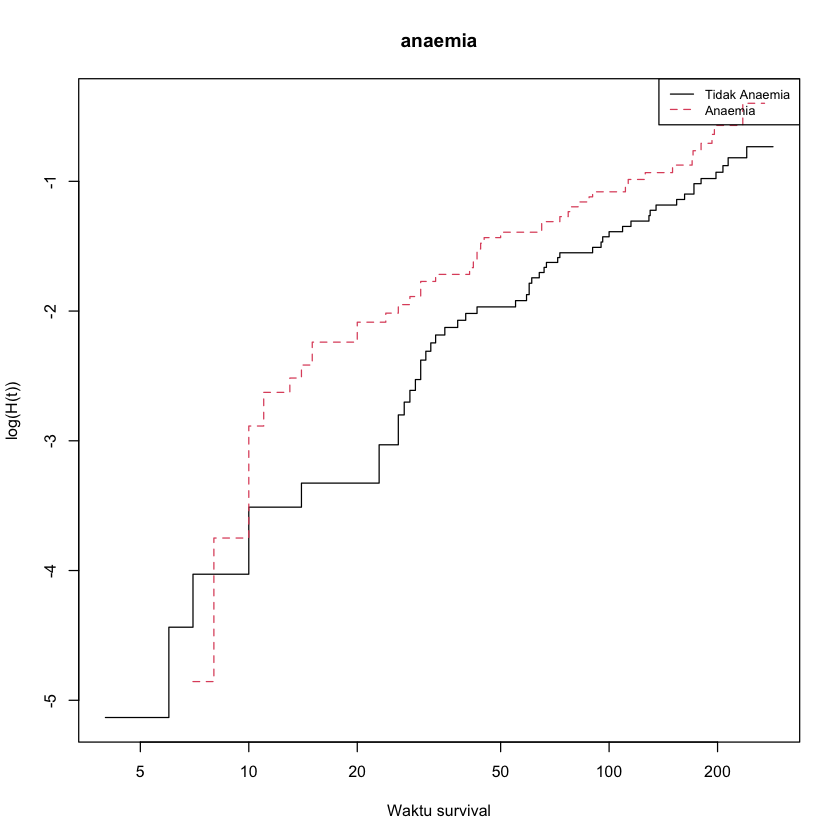

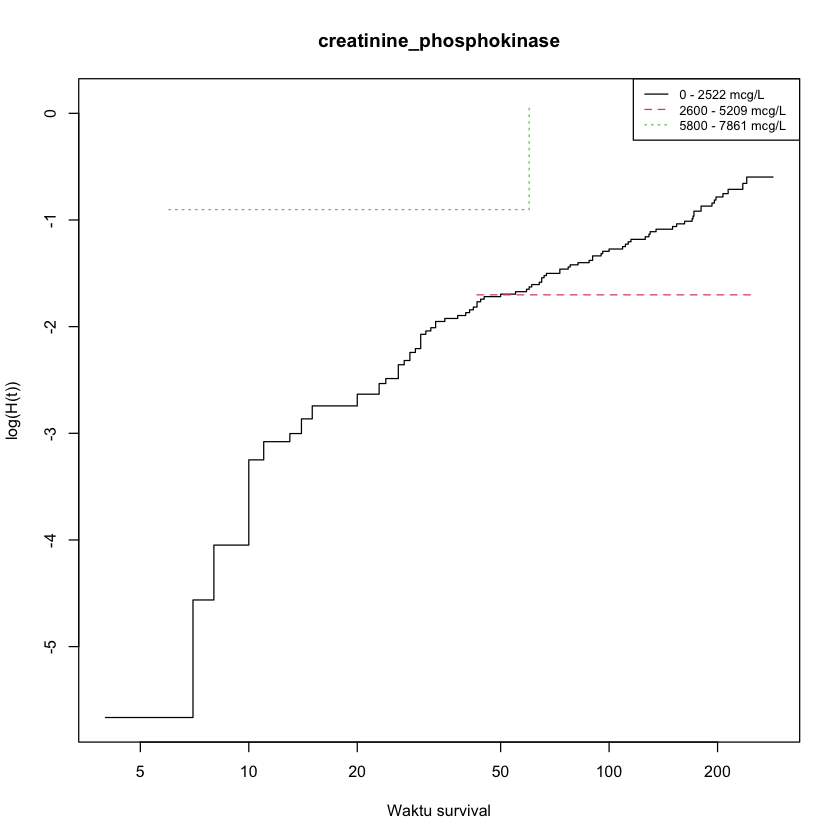

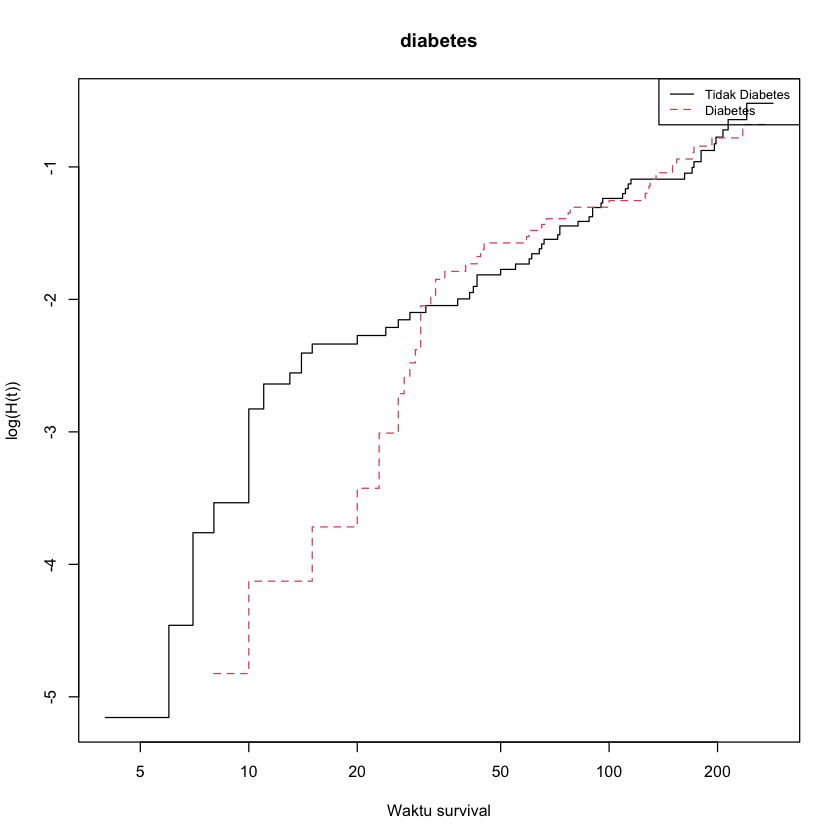

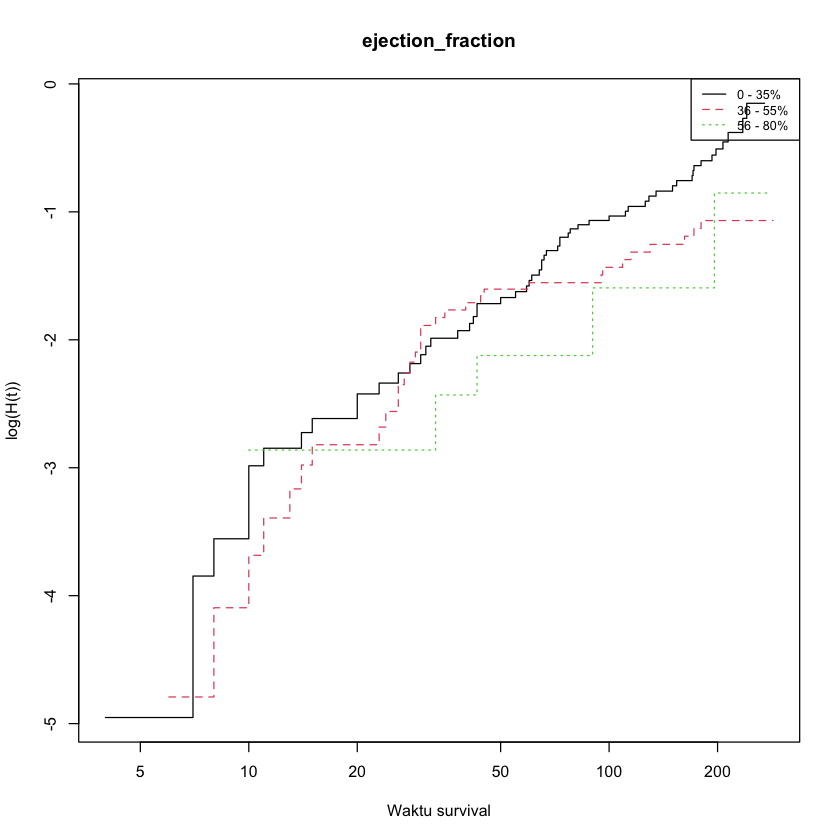

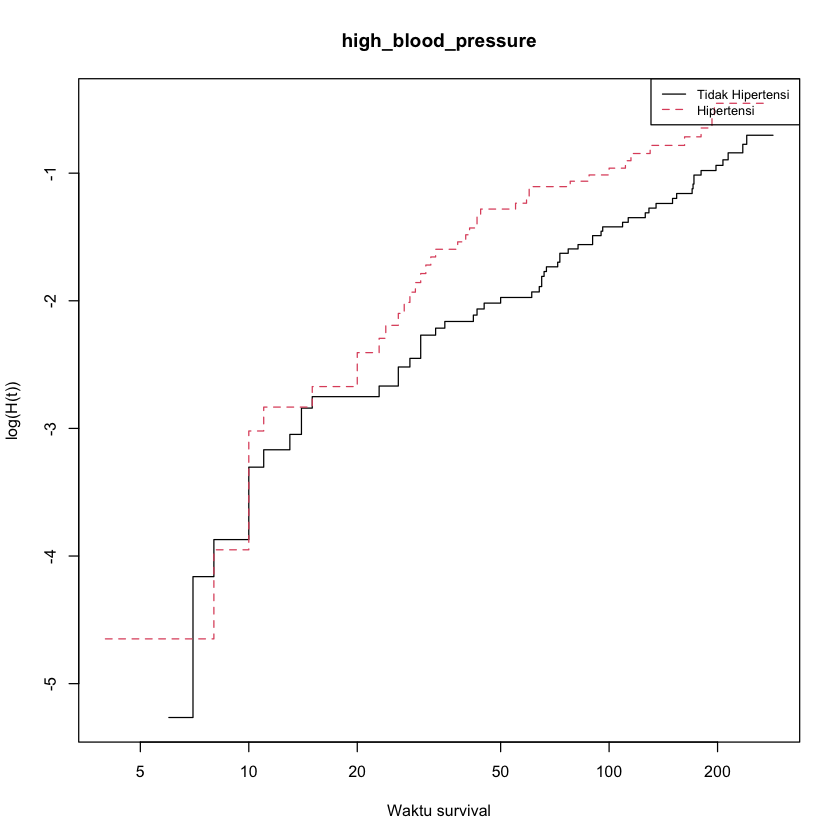

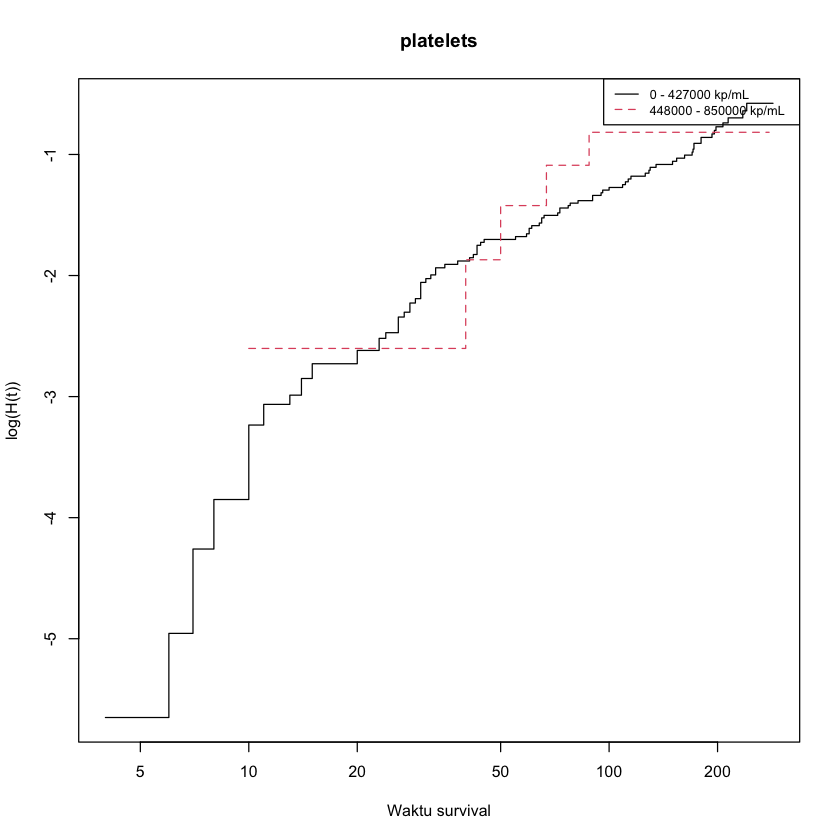

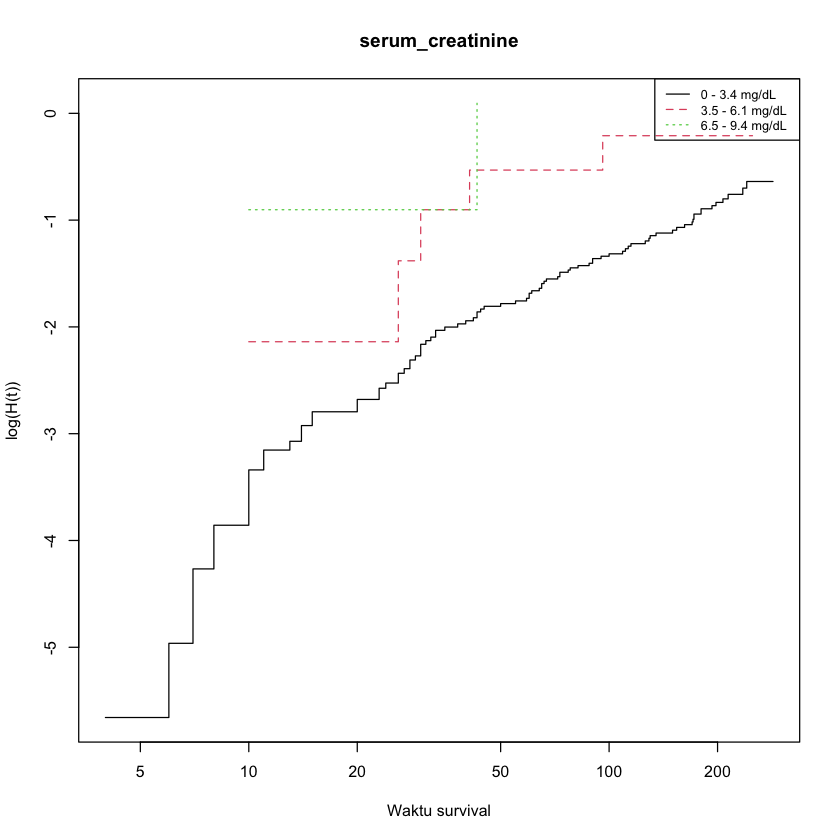

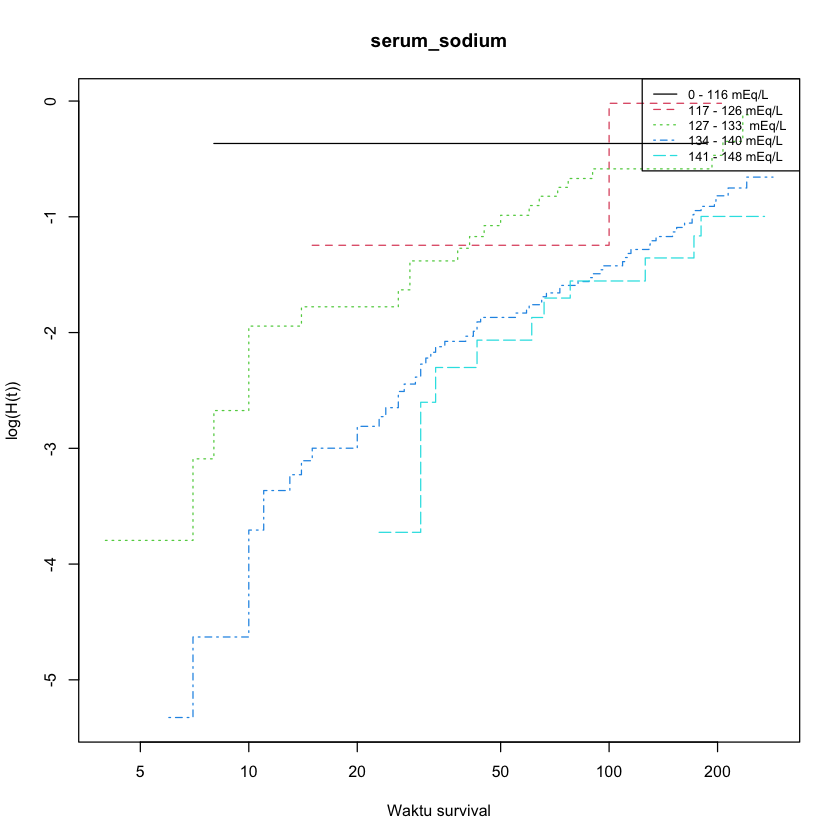

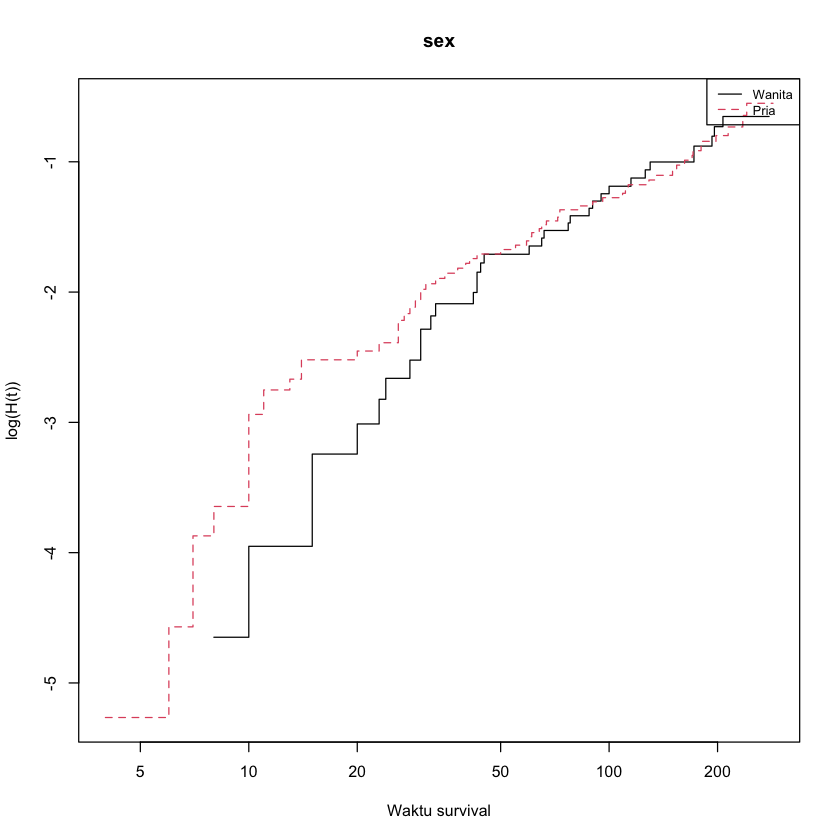

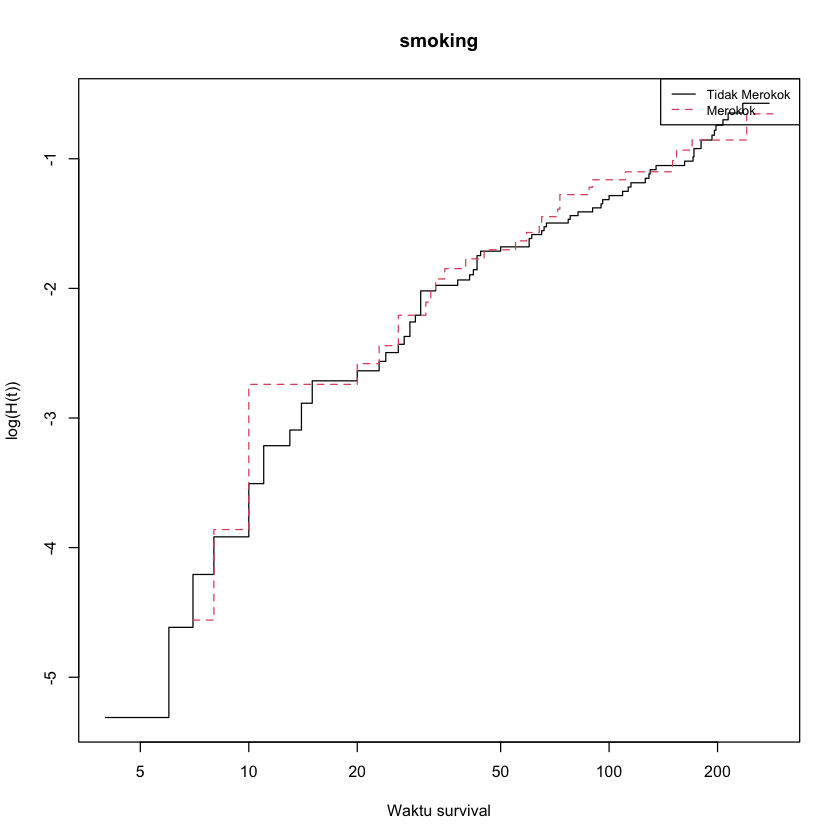

In [83]:
variables <- list(
  age = c('0 - 68', '68 +'),
  anaemia = c('Tidak Anaemia', 'Anaemia'),
  creatinine_phosphokinase = c('0 - 2522 mcg/L', '2600 - 5209 mcg/L' , '5800 - 7861 mcg/L'),
  diabetes = c('Tidak Diabetes','Diabetes'),
  ejection_fraction = c('0 - 35%','36 - 55%' , '56 - 80%'),
  high_blood_pressure = c('Tidak Hipertensi','Hipertensi'),
  platelets = c('0 - 427000 kp/mL','448000 - 850000 kp/mL'),
  serum_creatinine = c('0 - 3.4 mg/dL','3.5 - 6.1 mg/dL', '6.5 - 9.4 mg/dL'),
  serum_sodium = c('0 - 116 mEq/L','117 - 126 mEq/L', '127 - 133  mEq/L', '134 - 140 mEq/L' , '141 - 148 mEq/L'),
  sex = c('Wanita','Pria'),
  smoking = c('Tidak Merokok','Merokok')
)

par(mfrow = c(1,1), cex = 0.8)

for (var in names(variables)) {
  fit <- survfit(Surv(time, DEATH_EVENT) ~ get(var), data = df)

  plot(fit, lty = 1:length(variables[[var]]), col = 1:length(variables[[var]]), fun='cloglog',
       main = var, xlab = "Waktu survival", ylab = "log(H(t))")
  legend("topright", legend = variables[[var]], lty = 1:length(variables[[var]]), col = 1:length(variables[[var]]), cex = 0.8)
}

par(mfrow = c(1, 1))

**2. Cox PH Modelling**

In [95]:
fit.coxph <- coxph(Surv(time, DEATH_EVENT) ~  age  + ejection_fraction  +creatinine_phosphokinase + serum_creatinine + anaemia + high_blood_pressure + sex + platelets + serum_sodium + smoking + diabetes, 
                   data = df)

summary(fit.coxph)

Call:
coxph(formula = Surv(time, DEATH_EVENT) ~ age + ejection_fraction + 
    creatinine_phosphokinase + serum_creatinine + anaemia + high_blood_pressure + 
    sex + platelets + serum_sodium + smoking + diabetes, data = df)

  n= 299, number of events= 96 

                              coef exp(coef) se(coef)      z Pr(>|z|)    
age1                       0.94126   2.56321  0.22120  4.255 2.09e-05 ***
ejection_fraction1        -0.46061   0.63090  0.23112 -1.993  0.04627 *  
ejection_fraction2        -1.10094   0.33256  0.45922 -2.397  0.01651 *  
creatinine_phosphokinase1 -0.80254   0.44819  1.01356 -0.792  0.42847    
creatinine_phosphokinase2  1.61438   5.02479  0.63470  2.544  0.01097 *  
serum_creatinine1          0.69962   2.01299  0.49384  1.417  0.15657    
serum_creatinine2          2.20246   9.04725  0.69029  3.191  0.00142 ** 
anaemia1                   0.48079   1.61735  0.21595  2.226  0.02599 *  
high_blood_pressure1       0.30809   1.36082  0.22106  1.394  0.16341    


**Variabel Selection**

In [99]:
stepwise_fit <- stepAIC(fit.coxph, direction = "both")
summary(stepwise_fit)

Start:  AIC=999.14
Surv(time, DEATH_EVENT) ~ age + ejection_fraction + creatinine_phosphokinase + 
    serum_creatinine + anaemia + high_blood_pressure + sex + 
    platelets + serum_sodium + smoking + diabetes

                           Df     AIC
- serum_sodium              4  995.62
- platelets                 1  997.16
- sex                       1  997.17
- smoking                   1  997.18
- diabetes                  1  997.28
- high_blood_pressure       1  999.04
<none>                         999.14
- creatinine_phosphokinase  2 1000.54
- anaemia                   1 1002.04
- serum_creatinine          2 1003.56
- ejection_fraction         2 1004.15
- age                       1 1014.30

Step:  AIC=995.62
Surv(time, DEATH_EVENT) ~ age + ejection_fraction + creatinine_phosphokinase + 
    serum_creatinine + anaemia + high_blood_pressure + sex + 
    platelets + smoking + diabetes

                           Df     AIC
- sex                       1  993.63
- platelets          

Call:
coxph(formula = Surv(time, DEATH_EVENT) ~ age + ejection_fraction + 
    creatinine_phosphokinase + serum_creatinine + anaemia + high_blood_pressure, 
    data = df)

  n= 299, number of events= 96 

                             coef exp(coef) se(coef)      z Pr(>|z|)    
age1                       0.9094    2.4828   0.2103  4.325 1.53e-05 ***
ejection_fraction1        -0.5092    0.6010   0.2265 -2.248  0.02456 *  
ejection_fraction2        -1.0985    0.3334   0.4469 -2.458  0.01397 *  
creatinine_phosphokinase1 -0.8863    0.4122   1.0102 -0.877  0.38028    
creatinine_phosphokinase2  1.7085    5.5208   0.6114  2.794  0.00520 ** 
serum_creatinine1          0.8198    2.2700   0.4658  1.760  0.07839 .  
serum_creatinine2          2.2188    9.1964   0.6778  3.274  0.00106 ** 
anaemia1                   0.4358    1.5462   0.2131  2.045  0.04084 *  
high_blood_pressure1       0.3247    1.3837   0.2157  1.505  0.13223    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' '

**Final Model**

In [129]:
fit.coxph <- coxph(Surv(time, DEATH_EVENT) ~ age + ejection_fraction + creatinine_phosphokinase + 
    serum_creatinine + anaemia + high_blood_pressure , data=df)

summary(fit.coxph)

Call:
coxph(formula = Surv(time, DEATH_EVENT) ~ age + ejection_fraction + 
    creatinine_phosphokinase + serum_creatinine + anaemia + high_blood_pressure, 
    data = df)

  n= 299, number of events= 96 

                             coef exp(coef) se(coef)      z Pr(>|z|)    
age1                       0.9094    2.4828   0.2103  4.325 1.53e-05 ***
ejection_fraction1        -0.5092    0.6010   0.2265 -2.248  0.02456 *  
ejection_fraction2        -1.0985    0.3334   0.4469 -2.458  0.01397 *  
creatinine_phosphokinase1 -0.8863    0.4122   1.0102 -0.877  0.38028    
creatinine_phosphokinase2  1.7085    5.5208   0.6114  2.794  0.00520 ** 
serum_creatinine1          0.8198    2.2700   0.4658  1.760  0.07839 .  
serum_creatinine2          2.2188    9.1964   0.6778  3.274  0.00106 ** 
anaemia1                   0.4358    1.5462   0.2131  2.045  0.04084 *  
high_blood_pressure1       0.3247    1.3837   0.2157  1.505  0.13223    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' '

**Model Diagnostic**

                         chisq df     p
age                      0.226  1 0.635
ejection_fraction        6.356  2 0.042
creatinine_phosphokinase 0.624  2 0.732
serum_creatinine         0.675  2 0.713
anaemia                  0.268  1 0.605
high_blood_pressure      0.272  1 0.602
GLOBAL                   8.848  9 0.451


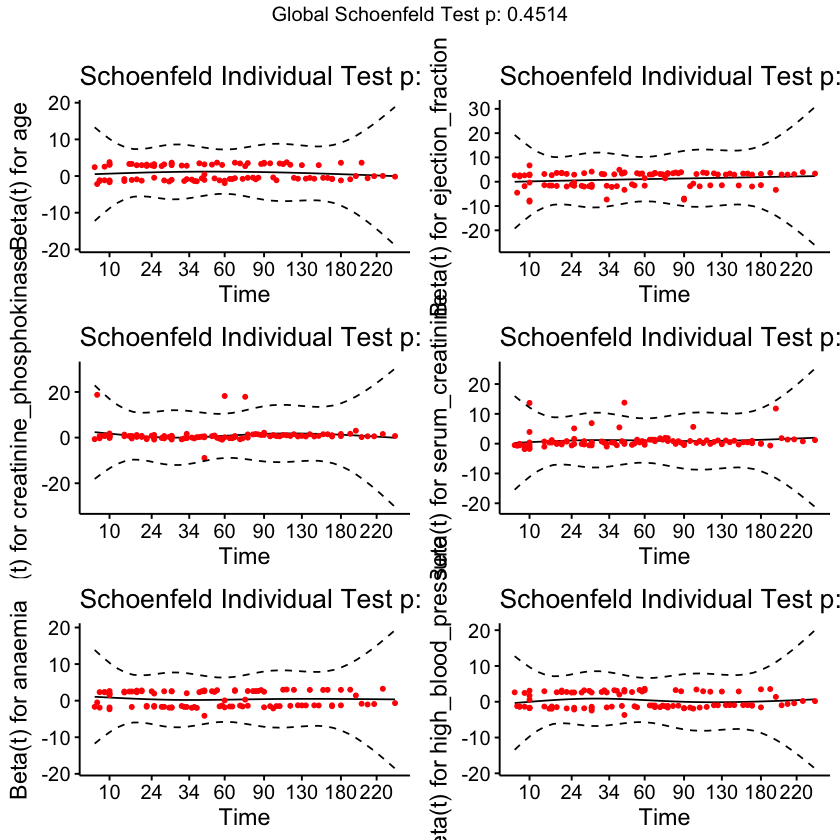

In [130]:
print(cox.zph(fit.coxph))
ggcoxzph(cox.zph(fit.coxph))

`geom_smooth()` using formula = 'y ~ x'


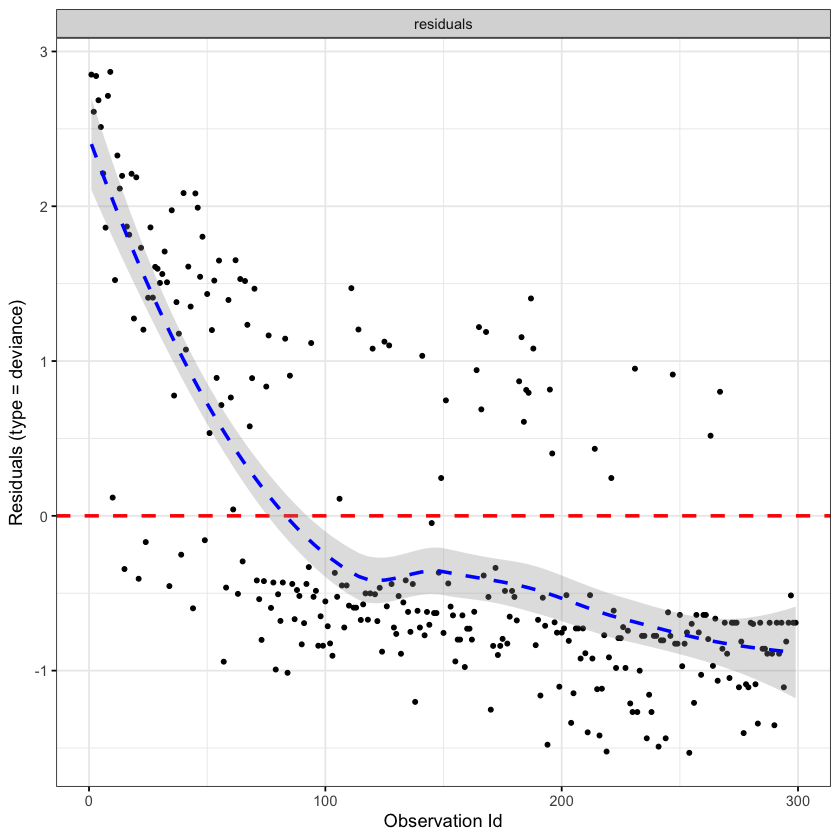

In [132]:
ploty <- ggcoxdiagnostics(fit.coxph, type = "deviance", linear.predictions = FALSE)
ploty